In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de CMI

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **Optimo**

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **GS**: Goloso secuencial.
- **GE**: Goloso expansivo.
- **GB**: Goloso Bruteforcer.
- **TS**: Tabu search.

# Experimentos
Leemos el dataframe con todos los resultados.

In [54]:
df_resultados = pd.read_csv("..\\results\\resultado.csv");

In [55]:
agg_funcs = {   "tiempo":"mean",
                "impacto":"mean",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean"}
df_resultados = df_resultados.groupby(['dataset','n','mG','mH','metodo']).aggregate(agg_funcs).reset_index()

## Experimento 1: Heuristicas con optimo conocido

In [56]:
df_optimo_heuristicas = df_resultados[(df_resultados["dataset"] == "optimo")];
df_optimo_heuristicas = df_optimo_heuristicas[(df_resultados["metodo"]=="GS") |
                                              (df_resultados["metodo"]=="GE") |
                                              (df_resultados["metodo"]=="GB") |
                                              (df_resultados["metodo"]=="OPTIMO")
                                             ].copy();
df_optimo_heuristicas

<ipython-input-56-3e3c60e75c30>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_optimo_heuristicas = df_optimo_heuristicas[(df_resultados["metodo"]=="GS") |


,dataset,n,mG,mH,metodo,tiempo,impacto,cant_colores,longitud_tabu,tipo_memoria,porcentaje_vecindad
0,optimo,6,7,2,GB,0.0,1.0,3.0,0,none,0
1,optimo,6,7,2,GE,0.0,1.0,5.0,0,none,0
2,optimo,6,7,2,GS,0.0,1.0,3.0,0,none,0
3,optimo,6,7,2,OPTIMO,0.0,1.0,4.0,0,none,0
4,optimo,8,8,8,GB,0.0,6.0,2.0,0,none,0
5,optimo,8,8,8,GE,0.0,5.0,3.0,0,none,0
6,optimo,8,8,8,GS,0.0,6.0,2.0,0,none,0
7,optimo,8,8,8,OPTIMO,0.0,6.0,2.0,0,none,0
8,optimo,10,20,5,GB,0.0,2.0,4.0,0,none,0
9,optimo,10,20,5,GE,0.0,3.0,7.0,0,none,0


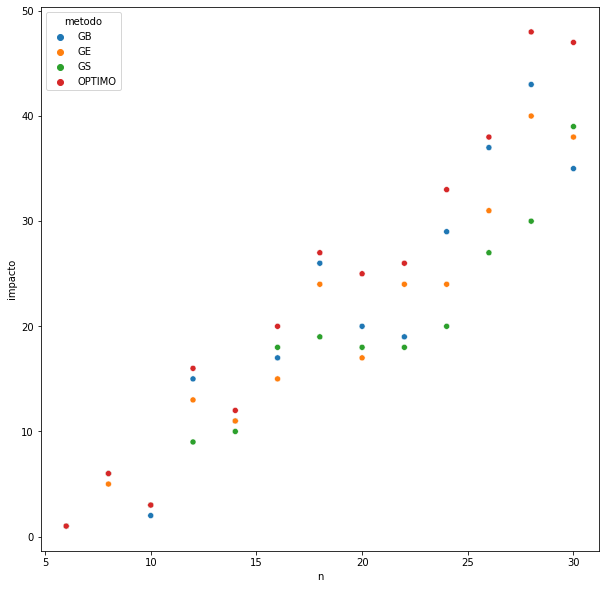

In [57]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.

plt.figure(figsize=(10, 10))
fig = sns.scatterplot(data=df_optimo_heuristicas, x='n', y='impacto', hue='metodo');
fig.set(xlabel='n', ylabel='impacto');
#plt.savefig("..\\graphs\\.svg");


In [58]:
agg_funcs = {   "tiempo":"mean",
                "impacto":"max",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean"}
df_optimo_heuristicas_max = df_optimo_heuristicas.groupby(['dataset','n','mG','mH']).aggregate(agg_funcs).reset_index()
df_optimo_heuristicas_max = df_optimo_heuristicas_max.append([df_optimo_heuristicas_max]*3,ignore_index=True)
df_optimo_heuristicas_max = df_optimo_heuristicas_max.sort_values('n').reset_index()
df_optimo_heuristicas['max'] = df_optimo_heuristicas_max['impacto']

In [59]:
df_optimo_heuristicas['diff_relativa'] = df_optimo_heuristicas.apply(lambda r: (r['max']-r['impacto'])/r['max'], axis=1)
df_optimo_heuristicas = df_optimo_heuristicas[df_optimo_heuristicas['metodo'] != 'OPTIMO']

<Figure size 1440x1440 with 0 Axes>

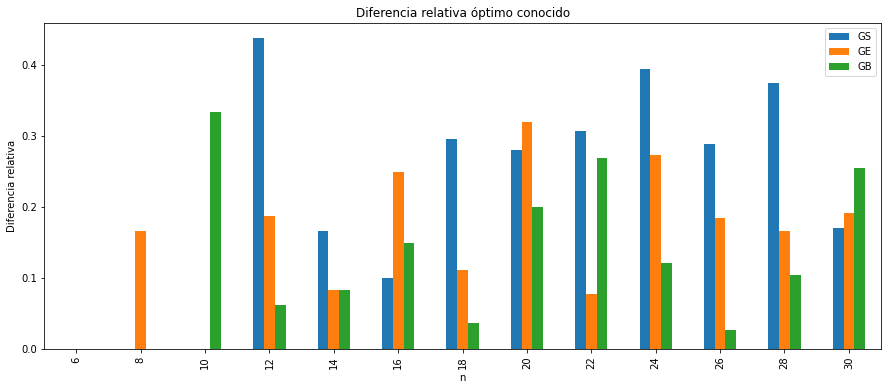

In [60]:

plt.figure(figsize=(20, 20))
plotdata = pd.DataFrame({
    "GS":df_optimo_heuristicas[df_optimo_heuristicas['metodo']=="GS"]['diff_relativa'].tolist(),
    "GE":df_optimo_heuristicas[df_optimo_heuristicas['metodo']=="GE"]['diff_relativa'].tolist(),
    "GB":df_optimo_heuristicas[df_optimo_heuristicas['metodo']=="GB"]['diff_relativa'].tolist()
    }, 
    index=df_optimo_heuristicas['n'].drop_duplicates().tolist()
)
ax = plotdata.plot(kind="bar", figsize=(15,6))
ax.set_title("Diferencia relativa óptimo conocido")
ax.set_xlabel('n')
ax.set_ylabel('Diferencia relativa')
plt.savefig("..\\graficos\\optimo-relativo.svg");

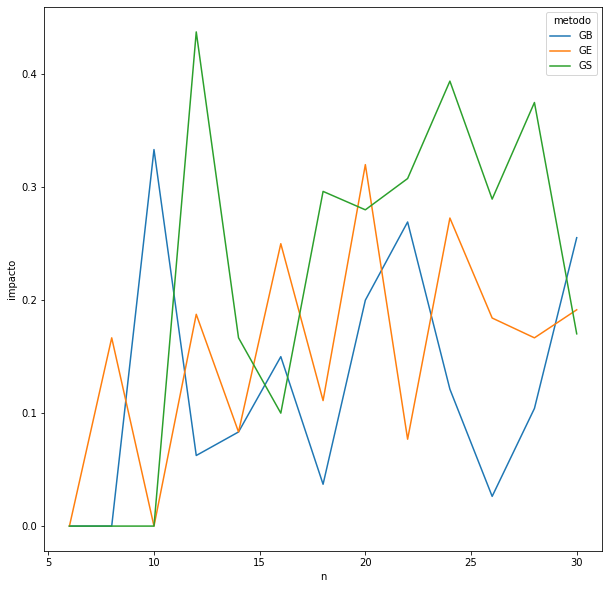

In [61]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
plt.figure(figsize=(10, 10))
fig = sns.lineplot(data=df_optimo_heuristicas, x='n', y='diff_relativa', hue='metodo');
fig.set(xlabel='n', ylabel='impacto');
#plt.savefig("..\\graphs\\.svg");

In [62]:
df_ralo_ralo = df_resultados[(df_resultados["dataset"] == "random-ralo-ralo")].copy().reset_index();

agg_funcs = {   "tiempo":"mean",
                "impacto":"max",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean"}
df_ralo_ralo_max = df_ralo_ralo.groupby(['dataset','n','mG','mH']).aggregate(agg_funcs).reset_index()
df_ralo_ralo_max = df_ralo_ralo_max.append([df_ralo_ralo_max]*2,ignore_index=True)
df_ralo_ralo_max = df_ralo_ralo_max.sort_values('n').reset_index()
df_ralo_ralo['max'] = df_ralo_ralo_max['impacto']

df_ralo_ralo['diff_relativa'] = df_ralo_ralo.apply(lambda r: (r['max']-r['impacto'])/r['max'], axis=1)
df_ralo_ralo = df_ralo_ralo[df_ralo_ralo['metodo'] != 'OPTIMO']


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

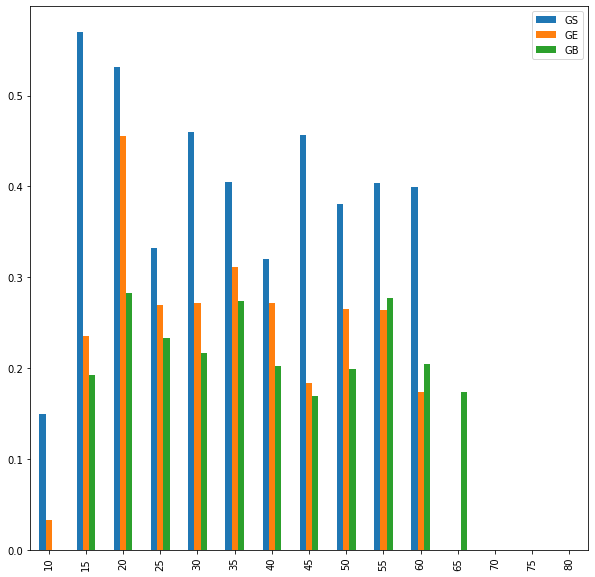

In [63]:
plt.figure(figsize=(20, 20))
plotdata = pd.DataFrame({
    "GS":df_ralo_ralo[df_ralo_ralo['metodo']=="GS"]['diff_relativa'].tolist(),
    "GE":df_ralo_ralo[df_ralo_ralo['metodo']=="GE"]['diff_relativa'].tolist(),
    "GB":df_ralo_ralo[df_ralo_ralo['metodo']=="GB"]['diff_relativa'].tolist()
    }, 
    index=df_ralo_ralo['n'].drop_duplicates().tolist()
)
plotdata.plot(kind="bar", figsize=(10,10))

In [64]:
def distancias_relativas(dataset):

    df_dataset = df_resultados[(df_resultados["dataset"] == dataset)].copy().reset_index();

    agg_funcs = {   "tiempo":"mean",
                    "impacto":"max",
                    "cant_colores": "mean",
                    "longitud_tabu": "mean",
                    "tipo_memoria": "first",
                    "porcentaje_vecindad": "mean"}
    df_dataset_max = df_dataset.groupby(['dataset','n','mG','mH']).aggregate(agg_funcs).reset_index()
    df_dataset_max = df_dataset_max.append([df_dataset_max]*3,ignore_index=True)
    df_dataset_max = df_dataset_max.sort_values('n').reset_index()
    df_dataset['max'] = df_dataset_max['impacto']

    df_dataset['diff_relativa'] = df_dataset.apply(lambda r: (r['max']-r['impacto'])/r['max'], axis=1)
    
    return df_dataset

In [65]:
def dataplot(df):

    plt.figure(figsize=(20, 20))
    plotdata = pd.DataFrame({
        "GS":df[df['metodo']=="GS"]['diff_relativa'].tolist(),
        "GE":df[df['metodo']=="GE"]['diff_relativa'].tolist(),
        "GB":df[df['metodo']=="GB"]['diff_relativa'].tolist(),
        "TS":df[df['metodo']=="TS"]['diff_relativa'].tolist()
        }, 
        index=df['n'].drop_duplicates().tolist()
    )
    return plotdata

In [66]:
datasets = ['random-ralo-ralo','random-ralo-denso','random-denso-ralo','random-denso-denso']
df_datasets = {}

for dataset in datasets: 
    df_datasets[dataset] = distancias_relativas(dataset)
    

<Figure size 1440x1440 with 0 Axes>

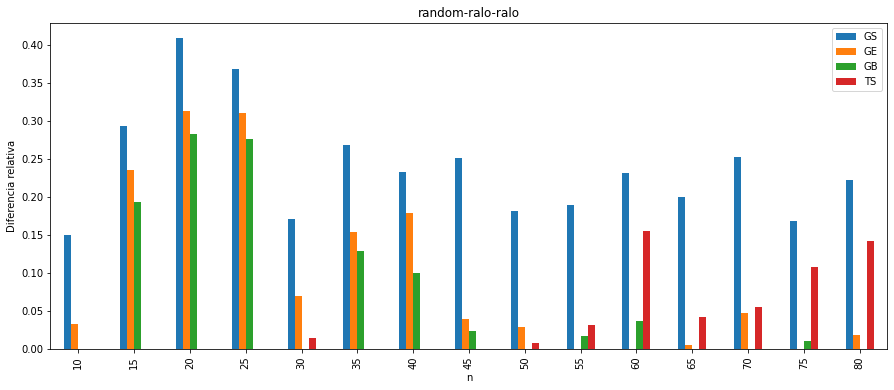

<Figure size 1440x1440 with 0 Axes>

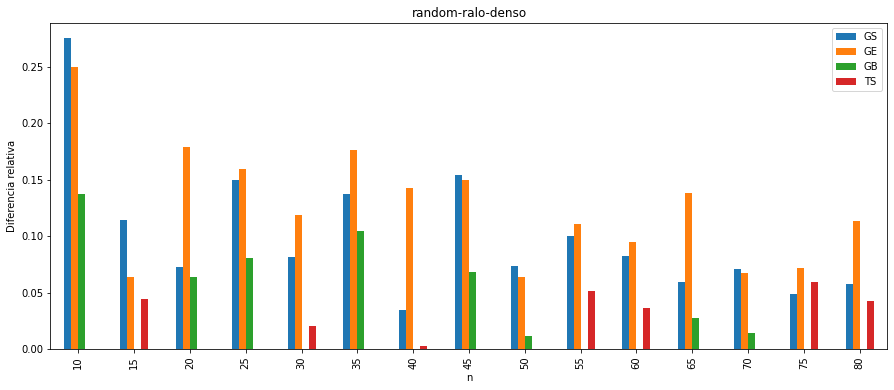

<Figure size 1440x1440 with 0 Axes>

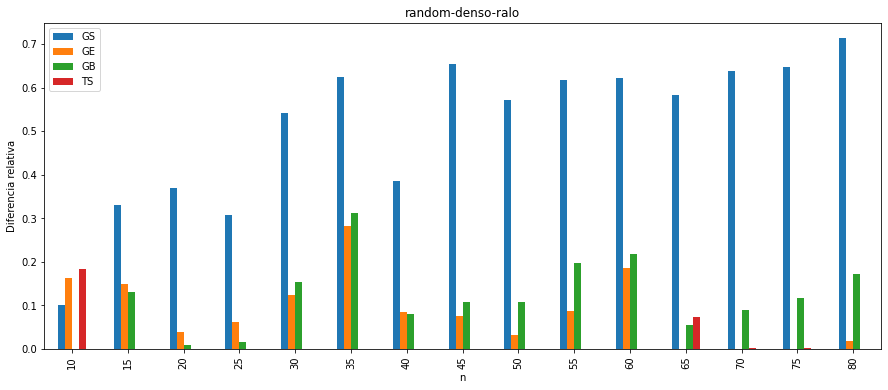

<Figure size 1440x1440 with 0 Axes>

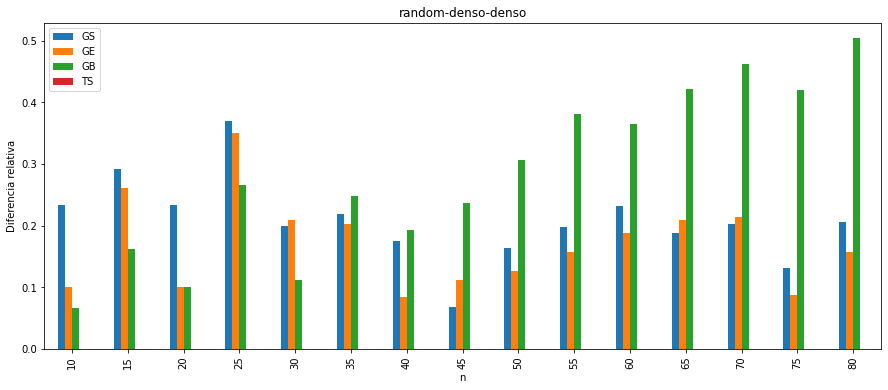

In [67]:
for dataset in datasets: 
    plotdata = dataplot(df_datasets[dataset])
    ax = plotdata.plot(kind="bar", figsize=(15,6))
    ax.set_title(dataset)
    ax.set_xlabel('n')
    ax.set_ylabel('Diferencia relativa')
    plt.savefig("..\\graficos\\" + dataset + "-relativo.svg");
    